<a href="https://colab.research.google.com/github/MannyVenegas/nfl-results-analysis/blob/main/NFL_Spread_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vamos a analizar los resultados de los últimos 5 años en la NFL, y así determinar que tanto se han cubierto las líneas de las apuestas



In [ ]:
# prompt: import the next libraries and their aliases: pandas, numpy, seaborn, matplotlib.pyplot, folium, plotly.express, warnings


!pip install -U kaleido
import kaleido
import plotly.io as pio
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium as fl
import plotly.express as px
import warnings

warnings.filterwarnings('ignore')
pio.renderers.default = 'png'



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.3 MB/s eta 0:00:00


In [ ]:
scores = pd.read_csv('/content/drive/MyDrive/NFL_DATA_ANALYSIS/CSVs/spreadspoke_scores.csv')

In [ ]:
scores.head()

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
0,9/2/1966,1966,1,False,Miami Dolphins,14.0,23.0,Oakland Raiders,NaN,NaN,NaN,Orange Bowl,False,83.0,6.0,71.0,NaN
1,9/3/1966,1966,1,False,Houston Oilers,45.0,7.0,Denver Broncos,NaN,NaN,NaN,Rice Stadium,False,81.0,7.0,70.0,NaN
2,9/4/1966,1966,1,False,San Diego Chargers,27.0,7.0,Buffalo Bills,NaN,NaN,NaN,Balboa Stadium,False,70.0,7.0,82.0,NaN
3,9/9/1966,1966,2,False,Miami Dolphins,14.0,19.0,New York Jets,NaN,NaN,NaN,Orange Bowl,False,82.0,11.0,78.0,NaN
4,9/10/1966,1966,1,False,Green Bay Packers,24.0,3.0,Baltimore Colts,NaN,NaN,NaN,Lambeau Field,False,64.0,8.0,62.0,NaN


In [ ]:
scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14073 entries, 0 to 14072
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   schedule_date        14073 non-null  object 
 1   schedule_season      14073 non-null  int64  
 2   schedule_week        14073 non-null  object 
 3   schedule_playoff     14073 non-null  bool   
 4   team_home            14073 non-null  object 
 5   score_home           13801 non-null  float64
 6   score_away           13801 non-null  float64
 7   team_away            14073 non-null  object 
 8   team_favorite_id     11322 non-null  object 
 9   spread_favorite      11322 non-null  float64
 10  over_under_line      11312 non-null  object 
 11  stadium              14073 non-null  object 
 12  stadium_neutral      14073 non-null  bool   
 13  weather_temperature  12525 non-null  float64
 14  weather_wind_mph     12509 non-null  float64
 15  weather_humidity     8476 non-null  

In [ ]:
scores['schedule_date'] = pd.to_datetime(scores['schedule_date'])
scores.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14073 entries, 0 to 14072
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   schedule_date        14073 non-null  datetime64[ns]
 1   schedule_season      14073 non-null  int64         
 2   schedule_week        14073 non-null  object        
 3   schedule_playoff     14073 non-null  bool          
 4   team_home            14073 non-null  object        
 5   score_home           13801 non-null  float64       
 6   score_away           13801 non-null  float64       
 7   team_away            14073 non-null  object        
 8   team_favorite_id     11322 non-null  object        
 9   spread_favorite      11322 non-null  float64       
 10  over_under_line      11312 non-null  object        
 11  stadium              14073 non-null  object        
 12  stadium_neutral      14073 non-null  bool          
 13  weather_temperature  12525 non-

In [ ]:
# Select the float64 columns
float_cols = scores.select_dtypes(include='float64').columns
float_cols

Index(['score_home', 'score_away', 'spread_favorite', 'weather_temperature',
       'weather_wind_mph', 'weather_humidity'],
      dtype='object')

In [ ]:
#convert the float values into int
scores[float_cols] = scores[float_cols].fillna(0).astype(int)

In [ ]:
scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14073 entries, 0 to 14072
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   schedule_date        14073 non-null  datetime64[ns]
 1   schedule_season      14073 non-null  int64         
 2   schedule_week        14073 non-null  object        
 3   schedule_playoff     14073 non-null  bool          
 4   team_home            14073 non-null  object        
 5   score_home           14073 non-null  int64         
 6   score_away           14073 non-null  int64         
 7   team_away            14073 non-null  object        
 8   team_favorite_id     11322 non-null  object        
 9   spread_favorite      14073 non-null  int64         
 10  over_under_line      11312 non-null  object        
 11  stadium              14073 non-null  object        
 12  stadium_neutral      14073 non-null  bool          
 13  weather_temperature  14073 non-

In [ ]:
# vamos solo a analizar los resultados desde el 2013 en adelante

scores_filtered = scores[scores['schedule_season'] >= 2013]
scores_filtered


,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
10809,2013-09-05,2013,1,False,Denver Broncos,49,27,Baltimore Ravens,DEN,-7,49.5,Sports Authority Field at Mile High,False,83,7,30,NaN
10810,2013-09-08,2013,1,False,Buffalo Bills,21,23,New England Patriots,NE,-10,51.5,Ralph Wilson Stadium,False,65,6,55,NaN
10811,2013-09-08,2013,1,False,Carolina Panthers,7,12,Seattle Seahawks,SEA,-3,45,Bank of America Stadium,False,87,7,48,NaN
10812,2013-09-08,2013,1,False,Chicago Bears,24,21,Cincinnati Bengals,CHI,-3,42,Soldier Field,False,77,13,79,NaN
10813,2013-09-08,2013,1,False,Cleveland Browns,10,23,Miami Dolphins,CLE,-2,40.5,FirstEnergy Stadium,False,72,16,80,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14068,2025-01-05,2024,18,False,New York Jets,0,0,Miami Dolphins,NaN,0,NaN,MetLife Stadium,False,0,0,0,NaN
14069,2025-01-05,2024,18,False,Philadelphia Eagles,0,0,New York Giants,NaN,0,NaN,Lincoln Financial Field,False,0,0,0,NaN
14070,2025-01-05,2024,18,False,Pittsburgh Steelers,0,0,Cincinnati Bengals,NaN,0,NaN,Acrisure Stadium,False,0,0,0,NaN
14071,2025-01-05,2024,18,False,Tampa Bay Buccaneers,0,0,New Orleans Saints,NaN,0,NaN,Raymond James Stadium,False,0,0,0,NaN


In [ ]:
# quitamos los juegos del 2024

scores_filtered = scores_filtered[scores_filtered['schedule_season'] < 2024]
scores_filtered


,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
10809,2013-09-05,2013,1,False,Denver Broncos,49,27,Baltimore Ravens,DEN,-7,49.5,Sports Authority Field at Mile High,False,83,7,30,NaN
10810,2013-09-08,2013,1,False,Buffalo Bills,21,23,New England Patriots,NE,-10,51.5,Ralph Wilson Stadium,False,65,6,55,NaN
10811,2013-09-08,2013,1,False,Carolina Panthers,7,12,Seattle Seahawks,SEA,-3,45,Bank of America Stadium,False,87,7,48,NaN
10812,2013-09-08,2013,1,False,Chicago Bears,24,21,Cincinnati Bengals,CHI,-3,42,Soldier Field,False,77,13,79,NaN
10813,2013-09-08,2013,1,False,Cleveland Browns,10,23,Miami Dolphins,CLE,-2,40.5,FirstEnergy Stadium,False,72,16,80,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13796,2024-01-21,2023,Division,True,Buffalo Bills,24,27,Kansas City Chiefs,BUF,-2,46,Highmark Stadium,False,25,11,67,NaN
13797,2024-01-21,2023,Division,True,Detroit Lions,31,23,Tampa Bay Buccaneers,DET,-6,49.5,Ford Field,False,72,0,0,indoor
13798,2024-01-28,2023,Conference,True,Baltimore Ravens,10,17,Kansas City Chiefs,BAL,-4,44,M&T Bank Stadium,False,47,7,83,NaN
13799,2024-01-28,2023,Conference,True,San Francisco 49ers,34,31,Detroit Lions,SF,-7,53.5,Levi's Stadium,False,69,5,55,NaN


In [ ]:
# cambiamos el valor del true or false por un valor numerico
# Select the boolean columns
bool_cols = scores_filtered.select_dtypes(include='bool').columns

# Convert boolean values to integers
scores_filtered[bool_cols] = scores_filtered[bool_cols].astype(int)
scores_filtered

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
10809,2013-09-05,2013,1,0,Denver Broncos,49,27,Baltimore Ravens,DEN,-7,49.5,Sports Authority Field at Mile High,0,83,7,30,NaN
10810,2013-09-08,2013,1,0,Buffalo Bills,21,23,New England Patriots,NE,-10,51.5,Ralph Wilson Stadium,0,65,6,55,NaN
10811,2013-09-08,2013,1,0,Carolina Panthers,7,12,Seattle Seahawks,SEA,-3,45,Bank of America Stadium,0,87,7,48,NaN
10812,2013-09-08,2013,1,0,Chicago Bears,24,21,Cincinnati Bengals,CHI,-3,42,Soldier Field,0,77,13,79,NaN
10813,2013-09-08,2013,1,0,Cleveland Browns,10,23,Miami Dolphins,CLE,-2,40.5,FirstEnergy Stadium,0,72,16,80,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13796,2024-01-21,2023,Division,1,Buffalo Bills,24,27,Kansas City Chiefs,BUF,-2,46,Highmark Stadium,0,25,11,67,NaN
13797,2024-01-21,2023,Division,1,Detroit Lions,31,23,Tampa Bay Buccaneers,DET,-6,49.5,Ford Field,0,72,0,0,indoor
13798,2024-01-28,2023,Conference,1,Baltimore Ravens,10,17,Kansas City Chiefs,BAL,-4,44,M&T Bank Stadium,0,47,7,83,NaN
13799,2024-01-28,2023,Conference,1,San Francisco 49ers,34,31,Detroit Lions,SF,-7,53.5,Levi's Stadium,0,69,5,55,NaN


In [ ]:
scores_filtered['total_score'] = scores_filtered['score_home'] + scores_filtered['score_away']
scores_filtered

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,total_score
10809,2013-09-05,2013,1,0,Denver Broncos,49,27,Baltimore Ravens,DEN,-7,49.5,Sports Authority Field at Mile High,0,83,7,30,NaN,76
10810,2013-09-08,2013,1,0,Buffalo Bills,21,23,New England Patriots,NE,-10,51.5,Ralph Wilson Stadium,0,65,6,55,NaN,44
10811,2013-09-08,2013,1,0,Carolina Panthers,7,12,Seattle Seahawks,SEA,-3,45,Bank of America Stadium,0,87,7,48,NaN,19
10812,2013-09-08,2013,1,0,Chicago Bears,24,21,Cincinnati Bengals,CHI,-3,42,Soldier Field,0,77,13,79,NaN,45
10813,2013-09-08,2013,1,0,Cleveland Browns,10,23,Miami Dolphins,CLE,-2,40.5,FirstEnergy Stadium,0,72,16,80,NaN,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13796,2024-01-21,2023,Division,1,Buffalo Bills,24,27,Kansas City Chiefs,BUF,-2,46,Highmark Stadium,0,25,11,67,NaN,51
13797,2024-01-21,2023,Division,1,Detroit Lions,31,23,Tampa Bay Buccaneers,DET,-6,49.5,Ford Field,0,72,0,0,indoor,54
13798,2024-01-28,2023,Conference,1,Baltimore Ravens,10,17,Kansas City Chiefs,BAL,-4,44,M&T Bank Stadium,0,47,7,83,NaN,27
13799,2024-01-28,2023,Conference,1,San Francisco 49ers,34,31,Detroit Lions,SF,-7,53.5,Levi's Stadium,0,69,5,55,NaN,65


In [ ]:
# vamos a crear un set de temporada regular y uno de playoffs
regular_season = scores_filtered[scores_filtered['schedule_playoff'] == 0]
playoffs = scores_filtered[scores_filtered['schedule_playoff'] == 1]

playoffs.head()

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,total_score
11065,2014-01-04,2013,Wildcard,1,Indianapolis Colts,45,44,Kansas City Chiefs,KC,-2,46.5,Lucas Oil Stadium,0,72,0,0,indoor,89
11066,2014-01-04,2013,Wildcard,1,Philadelphia Eagles,24,26,New Orleans Saints,PHI,-3,53,Lincoln Financial Field,0,0,0,0,NaN,50
11067,2014-01-05,2013,Wildcard,1,Cincinnati Bengals,10,27,San Diego Chargers,CIN,-6,48,Paul Brown Stadium,0,0,0,0,NaN,37
11068,2014-01-05,2013,Wildcard,1,Green Bay Packers,20,23,San Francisco 49ers,SF,-3,46,Lambeau Field,0,0,0,0,NaN,43
11069,2014-01-11,2013,Division,1,New England Patriots,43,22,Indianapolis Colts,NE,-7,51,Gillette Stadium,0,0,0,0,NaN,65


In [ ]:
regular_season.head()

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,total_score
10809,2013-09-05,2013,1,0,Denver Broncos,49,27,Baltimore Ravens,DEN,-7,49.5,Sports Authority Field at Mile High,0,83,7,30,NaN,76
10810,2013-09-08,2013,1,0,Buffalo Bills,21,23,New England Patriots,NE,-10,51.5,Ralph Wilson Stadium,0,65,6,55,NaN,44
10811,2013-09-08,2013,1,0,Carolina Panthers,7,12,Seattle Seahawks,SEA,-3,45,Bank of America Stadium,0,87,7,48,NaN,19
10812,2013-09-08,2013,1,0,Chicago Bears,24,21,Cincinnati Bengals,CHI,-3,42,Soldier Field,0,77,13,79,NaN,45
10813,2013-09-08,2013,1,0,Cleveland Browns,10,23,Miami Dolphins,CLE,-2,40.5,FirstEnergy Stadium,0,72,16,80,NaN,33


In [ ]:
# cambiemos el type de la columna de over_under
regular_season['over_under_line'] = regular_season['over_under_line'].astype(float).fillna(0).astype(int)
playoffs['over_under_line'] = playoffs['over_under_line'].astype(float).fillna(0).astype(int)


In [ ]:
# Calculate total games per season
total_games_per_season = regular_season.groupby('schedule_season')['schedule_date'].count()

# Calculate games where total score surpassed over/under line
games_over_line = regular_season[regular_season['total_score'] > regular_season['over_under_line']].groupby('schedule_season')['schedule_date'].count()

# Calculate percentage of games over line per season
percentage_over_line = (games_over_line / total_games_per_season) * 100

# Create a summary DataFrame
summary_df = pd.DataFrame({
    'Total Games': total_games_per_season,
    'Games Over Line': games_over_line,
    'Percentage Over Line': percentage_over_line
})

print(summary_df)

                 Total Games  Games Over Line  Percentage Over Line
schedule_season                                                    
2013                     256              130             50.781250
2014                     256              117             45.703125
2015                     256              120             46.875000
2016                     256              132             51.562500
2017                     256              115             44.921875
2018                     256              120             46.875000
2019                     256              128             50.000000
2020                     256              125             48.828125
2021                     272              125             45.955882
2022                     271              119             43.911439
2023                     272              123             45.220588


In [ ]:
summary_df

,Total Games,Games Over Line,Percentage Over Line
schedule_season,,,
2013,256,130,50.781250
2014,256,117,45.703125
2015,256,120,46.875000
2016,256,132,51.562500
2017,256,115,44.921875
2018,256,120,46.875000
2019,256,128,50.000000
2020,256,125,48.828125
2021,272,125,45.955882


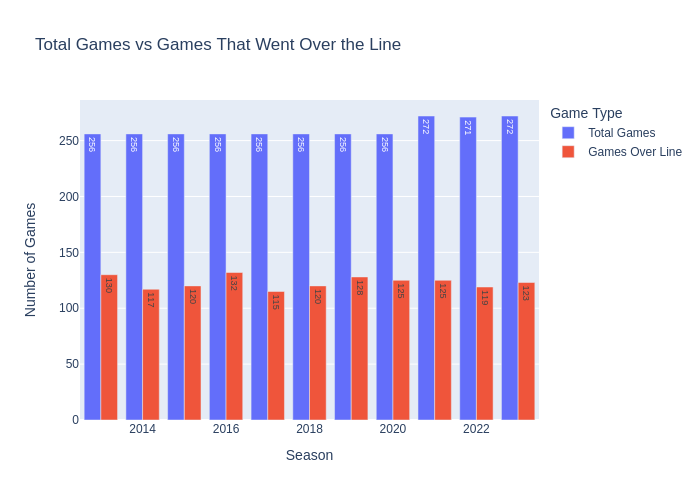

In [ ]:
# Create a bar plot using Plotly Express
fig = px.bar(summary_df, x=summary_df.index, y=['Total Games', 'Games Over Line'],
             barmode='group', labels={'x': 'Season', 'value': 'Juegos que pasaron el O/U'},
             title='Total Games vs Games That Went Over the Line',
             text_auto='')  # Add text labels to bars with 2 decimal places

# Update layout for better presentation
fig.update_layout(xaxis_title='Season', yaxis_title='Number of Games', legend_title='Game Type')
fig.update_traces(textposition='inside')

# Display the plot
fig.show()


In [ ]:
# prompt: export the summary_df to a csv in the next route /content/drive/MyDrive/NFL_DATA_ANALYSIS/CSVs and export the plot too

summary_df.to_csv('/content/drive/MyDrive/NFL_DATA_ANALYSIS/CSVs/summarytotalgames_vs_over.csv')
fig.write_image("/content/drive/MyDrive/NFL_DATA_ANALYSIS/CSVs/fig1.png")


In [ ]:
regular_season.head()

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,total_score
10809,2013-09-05,2013,1,0,Denver Broncos,49,27,Baltimore Ravens,DEN,-7,49,Sports Authority Field at Mile High,0,83,7,30,NaN,76
10810,2013-09-08,2013,1,0,Buffalo Bills,21,23,New England Patriots,NE,-10,51,Ralph Wilson Stadium,0,65,6,55,NaN,44
10811,2013-09-08,2013,1,0,Carolina Panthers,7,12,Seattle Seahawks,SEA,-3,45,Bank of America Stadium,0,87,7,48,NaN,19
10812,2013-09-08,2013,1,0,Chicago Bears,24,21,Cincinnati Bengals,CHI,-3,42,Soldier Field,0,77,13,79,NaN,45
10813,2013-09-08,2013,1,0,Cleveland Browns,10,23,Miami Dolphins,CLE,-2,40,FirstEnergy Stadium,0,72,16,80,NaN,33


In [ ]:
regular_season.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2863 entries, 10809 to 13787
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   schedule_date        2863 non-null   datetime64[ns]
 1   schedule_season      2863 non-null   int64         
 2   schedule_week        2863 non-null   object        
 3   schedule_playoff     2863 non-null   int64         
 4   team_home            2863 non-null   object        
 5   score_home           2863 non-null   int64         
 6   score_away           2863 non-null   int64         
 7   team_away            2863 non-null   object        
 8   team_favorite_id     2863 non-null   object        
 9   spread_favorite      2863 non-null   int64         
 10  over_under_line      2863 non-null   int64         
 11  stadium              2863 non-null   object        
 12  stadium_neutral      2863 non-null   int64         
 13  weather_temperature  2863 non-nul

In [ ]:
# Calculate max, min, and mean of 'weather_temperature'
max_temp = regular_season['weather_temperature'].max()
min_temp = regular_season['weather_temperature'].min()
mean_temp = regular_season['weather_temperature'].mean()

print("Maximum temperature:", max_temp)
print("Minimum temperature:", min_temp)
print("Mean temperature:", mean_temp)


Maximum temperature: 97
Minimum temperature: 0
Mean temperature: 44.96681802305274


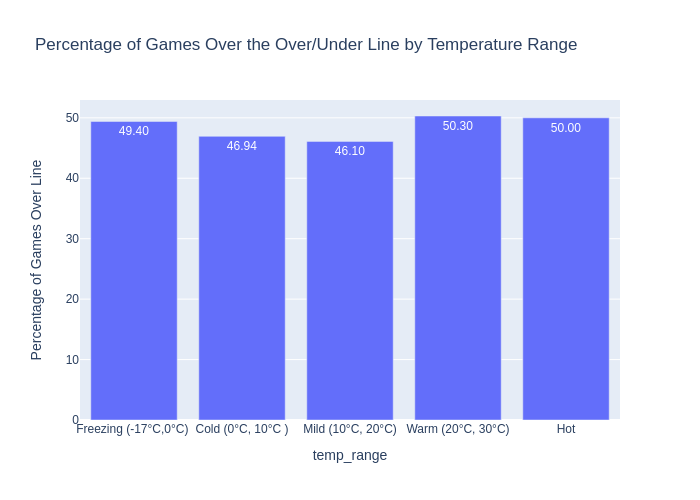

F-statistic: 2.71
P-value: 0.029
There is a statistically significant difference in the mean total scores between temperature ranges.


In [ ]:
# prompt: now i want to know if the temperature is a factor for the game to go under or over the over_under_line, how would you do this

# Create a new column 'over_line' indicating if the total score was over the line
regular_season['over_line'] = regular_season['total_score'] > regular_season['over_under_line']

# Group the data by temperature ranges and calculate the percentage of games over the line
temp_bins = [0, 32, 50, 68, 86, 100]  # Define temperature ranges
temp_labels = ['Freezing (-17°C,0°C) ', 'Cold (0°C, 10°C )', 'Mild (10°C, 20°C)', 'Warm (20°C, 30°C)', 'Hot']
regular_season['temp_range'] = pd.cut(regular_season['weather_temperature'], bins=temp_bins, labels=temp_labels)

over_line_by_temp = regular_season.groupby('temp_range')['over_line'].mean() * 100

# Create a bar plot using Plotly Express
fig = px.bar(over_line_by_temp, x=over_line_by_temp.index, y=over_line_by_temp.values,
             labels={'x': 'Temperature Range', 'y': 'Percentage of Games Over Line'},
             title='Percentage of Games Over the Over/Under Line by Temperature Range',
             text_auto='.2f')

# Display the plot
fig.show()

# Perform a statistical test to see if the difference in means is significant
from scipy.stats import f_oneway

# Group total scores by temperature range
groups = []
for temp_range in temp_labels:
  group = regular_season[regular_season['temp_range'] == temp_range]['total_score']
  groups.append(group)

# Perform ANOVA test
f_statistic, p_value = f_oneway(*groups)

print(f"F-statistic: {f_statistic:.2f}")
print(f"P-value: {p_value:.3f}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
  print("There is a statistically significant difference in the mean total scores between temperature ranges.")
else:
  print("There is no statistically significant difference in the mean total scores between temperature ranges.")


In [ ]:
over_line_by_temp

,over_line
temp_range,
"Freezing (-17°C,0°C)",49.397590
"Cold (0°C, 10°C )",46.938776
"Mild (10°C, 20°C)",46.100917
"Warm (20°C, 30°C)",50.301984
Hot,50.000000


In [ ]:
regular_season

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,total_score,over_line,temp_range
10809,2013-09-05,2013,1,0,Denver Broncos,49,27,Baltimore Ravens,DEN,-7,49,Sports Authority Field at Mile High,0,83,7,30,NaN,76,True,"Warm (20°C, 30°C)"
10810,2013-09-08,2013,1,0,Buffalo Bills,21,23,New England Patriots,NE,-10,51,Ralph Wilson Stadium,0,65,6,55,NaN,44,False,"Mild (10°C, 20°C)"
10811,2013-09-08,2013,1,0,Carolina Panthers,7,12,Seattle Seahawks,SEA,-3,45,Bank of America Stadium,0,87,7,48,NaN,19,False,Hot
10812,2013-09-08,2013,1,0,Chicago Bears,24,21,Cincinnati Bengals,CHI,-3,42,Soldier Field,0,77,13,79,NaN,45,True,"Warm (20°C, 30°C)"
10813,2013-09-08,2013,1,0,Cleveland Browns,10,23,Miami Dolphins,CLE,-2,40,FirstEnergy Stadium,0,72,16,80,NaN,33,False,"Warm (20°C, 30°C)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13783,2024-01-07,2023,18,0,New Orleans Saints,48,17,Atlanta Falcons,NO,-3,41,Caesars Superdome,0,72,0,0,indoor,65,True,"Warm (20°C, 30°C)"
13784,2024-01-07,2023,18,0,New York Giants,27,10,Philadelphia Eagles,PHI,-5,43,MetLife Stadium,0,0,0,0,NaN,37,False,NaN
13785,2024-01-07,2023,18,0,San Francisco 49ers,20,21,Los Angeles Rams,SF,-5,40,Levi's Stadium,0,0,0,0,NaN,41,True,NaN
13786,2024-01-07,2023,18,0,Tennessee Titans,28,20,Jacksonville Jaguars,JAX,-3,41,Nissan Stadium,0,0,0,0,NaN,48,True,NaN


In [ ]:
# list all the values in the favorite_id col

regular_season['team_favorite_id'].unique()
regular_season['team_favorite_id'].value_counts()


,count
team_favorite_id,
KC,141
NE,133
SEA,125
BAL,121
GB,121
PHI,116
NO,115
DAL,111
PIT,107


In [ ]:
# Show a field where favorite_id is 'LV'
regular_season[regular_season['team_favorite_id'] == 'LAR'].head(1)




,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,total_score,over_line,temp_range
10822,2013-09-08,2013,1,0,St. Louis Rams,27,24,Arizona Cardinals,LAR,-3,41,Edward Jones Dome,0,72,0,0,indoor,51,True,"Warm (20°C, 30°C)"


In [ ]:
# lets see what team names are listed to be able to convert them
regular_season['team_home'].unique()

array(['Denver Broncos', 'Buffalo Bills', 'Carolina Panthers',
       'Chicago Bears', 'Cleveland Browns', 'Dallas Cowboys',
       'Detroit Lions', 'Indianapolis Colts', 'Jacksonville Jaguars',
       'New Orleans Saints', 'New York Jets', 'Pittsburgh Steelers',
       'San Francisco 49ers', 'St. Louis Rams', 'San Diego Chargers',
       'Washington Redskins', 'New England Patriots', 'Arizona Cardinals',
       'Atlanta Falcons', 'Baltimore Ravens', 'Green Bay Packers',
       'Houston Texans', 'Kansas City Chiefs', 'New York Giants',
       'Oakland Raiders', 'Philadelphia Eagles', 'Seattle Seahawks',
       'Tampa Bay Buccaneers', 'Cincinnati Bengals', 'Miami Dolphins',
       'Minnesota Vikings', 'Tennessee Titans', 'Los Angeles Rams',
       'Los Angeles Chargers', 'Washington Football Team',
       'Las Vegas Raiders', 'Washington Commanders'], dtype=object)

In [ ]:
regular_season['team_away'].unique()

array(['Baltimore Ravens', 'New England Patriots', 'Seattle Seahawks',
       'Cincinnati Bengals', 'Miami Dolphins', 'New York Giants',
       'Minnesota Vikings', 'Oakland Raiders', 'Kansas City Chiefs',
       'Atlanta Falcons', 'Tampa Bay Buccaneers', 'Tennessee Titans',
       'Green Bay Packers', 'Arizona Cardinals', 'Houston Texans',
       'Philadelphia Eagles', 'New York Jets', 'Detroit Lions',
       'St. Louis Rams', 'Cleveland Browns', 'Carolina Panthers',
       'Washington Redskins', 'Dallas Cowboys', 'Denver Broncos',
       'Jacksonville Jaguars', 'San Diego Chargers',
       'San Francisco 49ers', 'New Orleans Saints', 'Pittsburgh Steelers',
       'Buffalo Bills', 'Chicago Bears', 'Indianapolis Colts',
       'Los Angeles Rams', 'Los Angeles Chargers', 'Las Vegas Raiders',
       'Washington Football Team', 'Washington Commanders'], dtype=object)

In [ ]:
# Create a dictionary to map old team names to new team names
team_name_mapping = {
    'Arizona Cardinals': 'ARI',
    'Atlanta Falcons': 'ATL',
    'Baltimore Ravens': 'BAL',
    'Buffalo Bills': 'BUF',
    'Carolina Panthers': 'CAR',
    'Chicago Bears': 'CHI',
    'Cincinnati Bengals': 'CIN',
    'Cleveland Browns': 'CLE',
    'Dallas Cowboys': 'DAL',
    'Denver Broncos': 'DEN',
    'Detroit Lions': 'DET',
    'Green Bay Packers': 'GB',
    'Houston Texans': 'HOU',
    'Indianapolis Colts': 'IND',
    'Jacksonville Jaguars': 'JAX',  # Correcting JAC to JAX
    'Kansas City Chiefs': 'KC',
    'Los Angeles Rams': 'LAR',
    'St. Louis Rams': 'LAR',# Assuming LA maps to LAR
    'Los Angeles Chargers': 'LAC',
    'San Diego Chargers': 'LAC',
    'Oakland Raiders': 'LVR',
    'Las Vegas Raiders': 'LVR',
    'Miami Dolphins': 'MIA',
    'Minnesota Vikings': 'MIN',
    'New England Patriots': 'NE',
    'New Orleans Saints': 'NO',
    'New York Giants': 'NYG',
    'New York Jets': 'NYJ', # Keeping OAK as it's present in favorite_id
    'Philadelphia Eagles': 'PHI',
    'Pittsburgh Steelers': 'PIT',
    'Seattle Seahawks': 'SEA',
    'San Francisco 49ers': 'SF',
    'Tampa Bay Buccaneers': 'TB',
    'Tennessee Titans': 'TEN',
    'Washington Football Team': 'WAS',
    'Washington Redskins': 'WAS',
    'Washington Commanders': 'WAS'
}

# Apply the mapping to the 'team_home' and 'team_away' columns
regular_season['team_home'] = regular_season['team_home'].map(team_name_mapping)
regular_season['team_away'] = regular_season['team_away'].map(team_name_mapping)

# Verify the changes
print(regular_season['team_home'].unique())
print(regular_season['team_away'].unique())


['DEN' 'BUF' 'CAR' 'CHI' 'CLE' 'DAL' 'DET' 'IND' 'JAX' 'NO' 'NYJ' 'PIT'
 'SF' 'LAR' 'LAC' 'WAS' 'NE' 'ARI' 'ATL' 'BAL' 'GB' 'HOU' 'KC' 'NYG' 'LVR'
 'PHI' 'SEA' 'TB' 'CIN' 'MIA' 'MIN' 'TEN']
['BAL' 'NE' 'SEA' 'CIN' 'MIA' 'NYG' 'MIN' 'LVR' 'KC' 'ATL' 'TB' 'TEN' 'GB'
 'ARI' 'HOU' 'PHI' 'NYJ' 'DET' 'LAR' 'CLE' 'CAR' 'WAS' 'DAL' 'DEN' 'JAX'
 'LAC' 'SF' 'NO' 'PIT' 'BUF' 'CHI' 'IND']


In [ ]:
regular_season['team_home'].value_counts()

,count
team_home,
DEN,90
NYJ,90
MIA,90
LVR,90
KC,90
HOU,90
BAL,90
BUF,90
LAC,90


In [ ]:
regular_season['team_away'].value_counts()

,count
team_away,
TB,90
ATL,90
DAL,90
LAR,90
DET,90
PHI,90
ARI,90
GB,90
WAS,90


In [ ]:
regular_season

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,total_score,over_line,temp_range
10809,2013-09-05,2013,1,0,DEN,49,27,BAL,DEN,-7,49,Sports Authority Field at Mile High,0,83,7,30,NaN,76,True,"Warm (20°C, 30°C)"
10810,2013-09-08,2013,1,0,BUF,21,23,NE,NE,-10,51,Ralph Wilson Stadium,0,65,6,55,NaN,44,False,"Mild (10°C, 20°C)"
10811,2013-09-08,2013,1,0,CAR,7,12,SEA,SEA,-3,45,Bank of America Stadium,0,87,7,48,NaN,19,False,Hot
10812,2013-09-08,2013,1,0,CHI,24,21,CIN,CHI,-3,42,Soldier Field,0,77,13,79,NaN,45,True,"Warm (20°C, 30°C)"
10813,2013-09-08,2013,1,0,CLE,10,23,MIA,CLE,-2,40,FirstEnergy Stadium,0,72,16,80,NaN,33,False,"Warm (20°C, 30°C)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13783,2024-01-07,2023,18,0,NO,48,17,ATL,NO,-3,41,Caesars Superdome,0,72,0,0,indoor,65,True,"Warm (20°C, 30°C)"
13784,2024-01-07,2023,18,0,NYG,27,10,PHI,PHI,-5,43,MetLife Stadium,0,0,0,0,NaN,37,False,NaN
13785,2024-01-07,2023,18,0,SF,20,21,LAR,SF,-5,40,Levi's Stadium,0,0,0,0,NaN,41,True,NaN
13786,2024-01-07,2023,18,0,TEN,28,20,JAX,JAX,-3,41,Nissan Stadium,0,0,0,0,NaN,48,True,NaN


In [ ]:
# Calculate if the favorite team won
regular_season['favorite_won'] = (
    (regular_season['team_favorite_id'] == regular_season['team_home']) & (regular_season['score_home'] > regular_season['score_away'])
) | (
    (regular_season['team_favorite_id'] == regular_season['team_away']) & (regular_season['score_away'] > regular_season['score_home'])
)

regular_season




,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,...,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,total_score,over_line,temp_range,favorite_won
10809,2013-09-05,2013,1,0,DEN,49,27,BAL,DEN,-7,...,Sports Authority Field at Mile High,0,83,7,30,NaN,76,True,"Warm (20°C, 30°C)",True
10810,2013-09-08,2013,1,0,BUF,21,23,NE,NE,-10,...,Ralph Wilson Stadium,0,65,6,55,NaN,44,False,"Mild (10°C, 20°C)",True
10811,2013-09-08,2013,1,0,CAR,7,12,SEA,SEA,-3,...,Bank of America Stadium,0,87,7,48,NaN,19,False,Hot,True
10812,2013-09-08,2013,1,0,CHI,24,21,CIN,CHI,-3,...,Soldier Field,0,77,13,79,NaN,45,True,"Warm (20°C, 30°C)",True
10813,2013-09-08,2013,1,0,CLE,10,23,MIA,CLE,-2,...,FirstEnergy Stadium,0,72,16,80,NaN,33,False,"Warm (20°C, 30°C)",False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13783,2024-01-07,2023,18,0,NO,48,17,ATL,NO,-3,...,Caesars Superdome,0,72,0,0,indoor,65,True,"Warm (20°C, 30°C)",True
13784,2024-01-07,2023,18,0,NYG,27,10,PHI,PHI,-5,...,MetLife Stadium,0,0,0,0,NaN,37,False,NaN,False
13785,2024-01-07,2023,18,0,SF,20,21,LAR,SF,-5,...,Levi's Stadium,0,0,0,0,NaN,41,True,NaN,False
13786,2024-01-07,2023,18,0,TEN,28,20,JAX,JAX,-3,...,Nissan Stadium,0,0,0,0,NaN,48,True,NaN,False


In [ ]:
# Convert boolean values in 'favorite_won' to integers (1 for True, 0 for False)
regular_season['favorite_won'] = regular_season['favorite_won'].astype(int)

regular_season


,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,...,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,total_score,over_line,temp_range,favorite_won
10809,2013-09-05,2013,1,0,DEN,49,27,BAL,DEN,-7,...,Sports Authority Field at Mile High,0,83,7,30,NaN,76,True,"Warm (20°C, 30°C)",1
10810,2013-09-08,2013,1,0,BUF,21,23,NE,NE,-10,...,Ralph Wilson Stadium,0,65,6,55,NaN,44,False,"Mild (10°C, 20°C)",1
10811,2013-09-08,2013,1,0,CAR,7,12,SEA,SEA,-3,...,Bank of America Stadium,0,87,7,48,NaN,19,False,Hot,1
10812,2013-09-08,2013,1,0,CHI,24,21,CIN,CHI,-3,...,Soldier Field,0,77,13,79,NaN,45,True,"Warm (20°C, 30°C)",1
10813,2013-09-08,2013,1,0,CLE,10,23,MIA,CLE,-2,...,FirstEnergy Stadium,0,72,16,80,NaN,33,False,"Warm (20°C, 30°C)",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13783,2024-01-07,2023,18,0,NO,48,17,ATL,NO,-3,...,Caesars Superdome,0,72,0,0,indoor,65,True,"Warm (20°C, 30°C)",1
13784,2024-01-07,2023,18,0,NYG,27,10,PHI,PHI,-5,...,MetLife Stadium,0,0,0,0,NaN,37,False,NaN,0
13785,2024-01-07,2023,18,0,SF,20,21,LAR,SF,-5,...,Levi's Stadium,0,0,0,0,NaN,41,True,NaN,0
13786,2024-01-07,2023,18,0,TEN,28,20,JAX,JAX,-3,...,Nissan Stadium,0,0,0,0,NaN,48,True,NaN,0


In [ ]:
#check irregular cases
regular_season[regular_season['team_favorite_id'] == 'PICK'].head(10)

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,...,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,total_score,over_line,temp_range,favorite_won
10900,2013-10-14,2013,6,0,LAC,19,9,IND,PICK,0,...,Qualcomm Stadium,0,69,3,69,NaN,28,False,"Warm (20°C, 30°C)",0
10940,2013-11-03,2013,9,0,WAS,30,24,LAC,PICK,0,...,FedEx Field,0,57,20,41,NaN,54,True,"Mild (10°C, 20°C)",0
11380,2015-09-27,2015,3,0,DAL,28,39,ATL,PICK,0,...,Cowboys Stadium,0,72,0,0,indoor,67,True,"Warm (20°C, 30°C)",0
11459,2015-11-01,2015,8,0,PIT,10,16,CIN,PICK,0,...,Heinz Field,0,63,9,0,NaN,26,False,"Mild (10°C, 20°C)",0
11498,2015-11-22,2015,11,0,MIN,13,30,GB,PICK,0,...,TCF Bank Stadium,0,32,7,0,NaN,43,False,"Freezing (-17°C,0°C)",0
11532,2015-12-06,2015,13,0,TB,23,19,ATL,PICK,0,...,Raymond James Stadium,0,78,11,0,NaN,42,False,"Warm (20°C, 30°C)",0
11626,2016-09-15,2016,2,0,BUF,31,37,NYJ,PICK,0,...,New Era Field,0,54,2,0,NaN,68,True,"Mild (10°C, 20°C)",0
11756,2016-11-14,2016,10,0,NYG,21,20,CIN,PICK,0,...,MetLife Stadium,0,54,1,0,NaN,41,False,"Mild (10°C, 20°C)",0
12083,2017-12-10,2017,14,0,TB,21,24,DET,PICK,0,...,Raymond James Stadium,0,55,9,0,NaN,45,False,"Mild (10°C, 20°C)",0


In [ ]:
#lets drop the fields where team_favorite_id is equal to PICK, which means there was not a favorite
regular_season = regular_season[regular_season['team_favorite_id'] != 'PICK']
regular_season

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,...,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,total_score,over_line,temp_range,favorite_won
10809,2013-09-05,2013,1,0,DEN,49,27,BAL,DEN,-7,...,Sports Authority Field at Mile High,0,83,7,30,NaN,76,True,"Warm (20°C, 30°C)",1
10810,2013-09-08,2013,1,0,BUF,21,23,NE,NE,-10,...,Ralph Wilson Stadium,0,65,6,55,NaN,44,False,"Mild (10°C, 20°C)",1
10811,2013-09-08,2013,1,0,CAR,7,12,SEA,SEA,-3,...,Bank of America Stadium,0,87,7,48,NaN,19,False,Hot,1
10812,2013-09-08,2013,1,0,CHI,24,21,CIN,CHI,-3,...,Soldier Field,0,77,13,79,NaN,45,True,"Warm (20°C, 30°C)",1
10813,2013-09-08,2013,1,0,CLE,10,23,MIA,CLE,-2,...,FirstEnergy Stadium,0,72,16,80,NaN,33,False,"Warm (20°C, 30°C)",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13783,2024-01-07,2023,18,0,NO,48,17,ATL,NO,-3,...,Caesars Superdome,0,72,0,0,indoor,65,True,"Warm (20°C, 30°C)",1
13784,2024-01-07,2023,18,0,NYG,27,10,PHI,PHI,-5,...,MetLife Stadium,0,0,0,0,NaN,37,False,NaN,0
13785,2024-01-07,2023,18,0,SF,20,21,LAR,SF,-5,...,Levi's Stadium,0,0,0,0,NaN,41,True,NaN,0
13786,2024-01-07,2023,18,0,TEN,28,20,JAX,JAX,-3,...,Nissan Stadium,0,0,0,0,NaN,48,True,NaN,0


In [ ]:

# Convert 'spread_favorite' to positive values
regular_season['spread_favorite'] = regular_season['spread_favorite'].abs()

regular_season.head()


,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,...,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,total_score,over_line,temp_range,favorite_won
10809,2013-09-05,2013,1,0,DEN,49,27,BAL,DEN,7,...,Sports Authority Field at Mile High,0,83,7,30,NaN,76,True,"Warm (20°C, 30°C)",1
10810,2013-09-08,2013,1,0,BUF,21,23,NE,NE,10,...,Ralph Wilson Stadium,0,65,6,55,NaN,44,False,"Mild (10°C, 20°C)",1
10811,2013-09-08,2013,1,0,CAR,7,12,SEA,SEA,3,...,Bank of America Stadium,0,87,7,48,NaN,19,False,Hot,1
10812,2013-09-08,2013,1,0,CHI,24,21,CIN,CHI,3,...,Soldier Field,0,77,13,79,NaN,45,True,"Warm (20°C, 30°C)",1
10813,2013-09-08,2013,1,0,CLE,10,23,MIA,CLE,2,...,FirstEnergy Stadium,0,72,16,80,NaN,33,False,"Warm (20°C, 30°C)",0


In [ ]:
# prompt: now i need a new column called covered_spread and in case the favorite won, then we should calculate the difference between the score and if it was greater than the spread_favorite it should be true, otherwise it should say false

# Calculate if the favorite team covered the spread
regular_season['covered_spread'] = (
    (regular_season['favorite_won'] == 1) &
    (
        (
            (regular_season['team_favorite_id'] == regular_season['team_home']) &
            (regular_season['score_home'] - regular_season['score_away'] > regular_season['spread_favorite'])
        ) |
        (
            (regular_season['team_favorite_id'] == regular_season['team_away']) &
            (regular_season['score_away'] - regular_season['score_home'] > regular_season['spread_favorite'])
        )
    )
)

regular_season


,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,...,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,total_score,over_line,temp_range,favorite_won,covered_spread
10809,2013-09-05,2013,1,0,DEN,49,27,BAL,DEN,7,...,0,83,7,30,NaN,76,True,"Warm (20°C, 30°C)",1,True
10810,2013-09-08,2013,1,0,BUF,21,23,NE,NE,10,...,0,65,6,55,NaN,44,False,"Mild (10°C, 20°C)",1,False
10811,2013-09-08,2013,1,0,CAR,7,12,SEA,SEA,3,...,0,87,7,48,NaN,19,False,Hot,1,True
10812,2013-09-08,2013,1,0,CHI,24,21,CIN,CHI,3,...,0,77,13,79,NaN,45,True,"Warm (20°C, 30°C)",1,False
10813,2013-09-08,2013,1,0,CLE,10,23,MIA,CLE,2,...,0,72,16,80,NaN,33,False,"Warm (20°C, 30°C)",0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13783,2024-01-07,2023,18,0,NO,48,17,ATL,NO,3,...,0,72,0,0,indoor,65,True,"Warm (20°C, 30°C)",1,True
13784,2024-01-07,2023,18,0,NYG,27,10,PHI,PHI,5,...,0,0,0,0,NaN,37,False,NaN,0,False
13785,2024-01-07,2023,18,0,SF,20,21,LAR,SF,5,...,0,0,0,0,NaN,41,True,NaN,0,False
13786,2024-01-07,2023,18,0,TEN,28,20,JAX,JAX,3,...,0,0,0,0,NaN,48,True,NaN,0,False


In [ ]:
# Drop the columns we won't use


regular_season.head()


,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,...,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,total_score,over_line,temp_range,favorite_won,covered_spread
10809,2013-09-05,2013,1,0,DEN,49,27,BAL,DEN,7,...,0,83,7,30,NaN,76,True,"Warm (20°C, 30°C)",1,True
10810,2013-09-08,2013,1,0,BUF,21,23,NE,NE,10,...,0,65,6,55,NaN,44,False,"Mild (10°C, 20°C)",1,False
10811,2013-09-08,2013,1,0,CAR,7,12,SEA,SEA,3,...,0,87,7,48,NaN,19,False,Hot,1,True
10812,2013-09-08,2013,1,0,CHI,24,21,CIN,CHI,3,...,0,77,13,79,NaN,45,True,"Warm (20°C, 30°C)",1,False
10813,2013-09-08,2013,1,0,CLE,10,23,MIA,CLE,2,...,0,72,16,80,NaN,33,False,"Warm (20°C, 30°C)",0,False


In [ ]:
regular_season = regular_season.drop(columns=['temp_range', 'weather_wind_mph'])
regular_season.head()

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_humidity,weather_detail,total_score,over_line,favorite_won,covered_spread
10809,2013-09-05,2013,1,0,DEN,49,27,BAL,DEN,7,49,Sports Authority Field at Mile High,0,83,30,NaN,76,True,1,True
10810,2013-09-08,2013,1,0,BUF,21,23,NE,NE,10,51,Ralph Wilson Stadium,0,65,55,NaN,44,False,1,False
10811,2013-09-08,2013,1,0,CAR,7,12,SEA,SEA,3,45,Bank of America Stadium,0,87,48,NaN,19,False,1,True
10812,2013-09-08,2013,1,0,CHI,24,21,CIN,CHI,3,42,Soldier Field,0,77,79,NaN,45,True,1,False
10813,2013-09-08,2013,1,0,CLE,10,23,MIA,CLE,2,40,FirstEnergy Stadium,0,72,80,NaN,33,False,0,False


In [ ]:
# Convert booleans into ints
regular_season['over_line'] = regular_season['over_line'].astype(int)
regular_season['covered_spread'] = regular_season['covered_spread'].astype(int)
regular_season.head()

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_humidity,weather_detail,total_score,over_line,favorite_won,covered_spread
10809,2013-09-05,2013,1,0,DEN,49,27,BAL,DEN,7,49,Sports Authority Field at Mile High,0,83,30,NaN,76,1,1,1
10810,2013-09-08,2013,1,0,BUF,21,23,NE,NE,10,51,Ralph Wilson Stadium,0,65,55,NaN,44,0,1,0
10811,2013-09-08,2013,1,0,CAR,7,12,SEA,SEA,3,45,Bank of America Stadium,0,87,48,NaN,19,0,1,1
10812,2013-09-08,2013,1,0,CHI,24,21,CIN,CHI,3,42,Soldier Field,0,77,79,NaN,45,1,1,0
10813,2013-09-08,2013,1,0,CLE,10,23,MIA,CLE,2,40,FirstEnergy Stadium,0,72,80,NaN,33,0,0,0


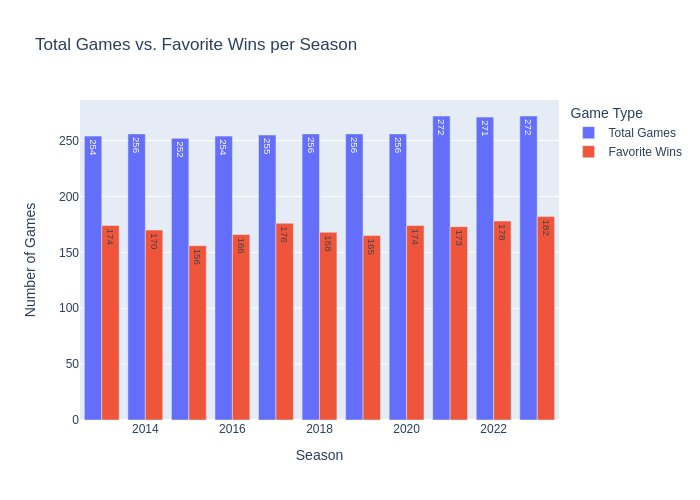

,Total Games,Favorite Wins,Percentage Favorite Wins
schedule_season,,,
2013,254,174,68.503937
2014,256,170,66.406250
2015,252,156,61.904762
2016,254,166,65.354331
2017,255,176,69.019608
2018,256,168,65.625000
2019,256,165,64.453125
2020,256,174,67.968750
2021,272,173,63.602941


In [ ]:
# prompt: can we do a chart that shows the amount of games each season and how often did the favorite win and what percentage it is

# Calculate total games and favorite wins per season
games_per_season = regular_season.groupby('schedule_season')['schedule_week'].count()
favorite_wins_per_season = regular_season[regular_season['favorite_won'] == 1].groupby('schedule_season')['schedule_week'].count()

# Calculate percentage of favorite wins
percentage_favorite_wins = (favorite_wins_per_season / games_per_season) * 100

# Create a summary DataFrame
summary_df = pd.DataFrame({
    'Total Games': games_per_season,
    'Favorite Wins': favorite_wins_per_season,
    'Percentage Favorite Wins': percentage_favorite_wins
})

# Create a bar plot using Plotly Express
fig = px.bar(summary_df, x=summary_df.index, y=['Total Games', 'Favorite Wins'],
             barmode='group', labels={'x': 'Season', 'value': 'Number of Games'},
             title='Total Games vs. Favorite Wins per Season',
             text_auto='')  # Add text labels to bars with 2 decimal places

# Update layout for better presentation
fig.update_layout(xaxis_title='Season', yaxis_title='Number of Games', legend_title='Game Type')
fig.update_traces(textposition='inside')

# Display the plot
fig.show()
summary_df


In [ ]:
#export the files
summary_df.to_csv('/content/drive/MyDrive/NFL_DATA_ANALYSIS/CSVs/total_vs_fav_wins.csv')
fig.write_image("/content/drive/MyDrive/NFL_DATA_ANALYSIS/CSVs/fig2.png")


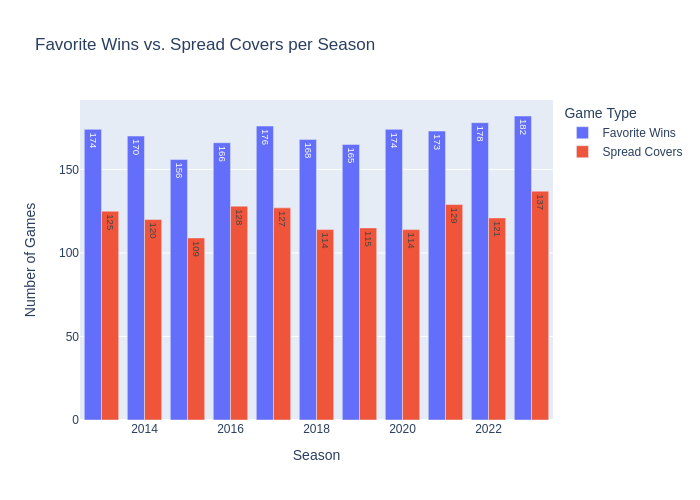

,Favorite Wins,Spread Covers,Percentage Spread Covers
schedule_season,,,
2013,174,125,71.839080
2014,170,120,70.588235
2015,156,109,69.871795
2016,166,128,77.108434
2017,176,127,72.159091
2018,168,114,67.857143
2019,165,115,69.696970
2020,174,114,65.517241
2021,173,129,74.566474


In [ ]:
# now i want to know out of those favorite wins how many of them actually
# covered the spread

# Calculate total favorite wins and spread covers per season
favorite_wins_per_season = regular_season[regular_season['favorite_won'] == 1].groupby('schedule_season')['schedule_week'].count()
spread_covers_per_season = regular_season[(regular_season['favorite_won'] == 1) & (regular_season['covered_spread'] == 1)].groupby('schedule_season')['schedule_week'].count()

# Calculate percentage of spread covers among favorite wins
percentage_spread_covers = (spread_covers_per_season / favorite_wins_per_season) * 100

# Create a summary DataFrame
summary_df = pd.DataFrame({
    'Favorite Wins': favorite_wins_per_season,
    'Spread Covers': spread_covers_per_season,
    'Percentage Spread Covers': percentage_spread_covers
})

# Create a bar plot using Plotly Express
fig = px.bar(summary_df, x=summary_df.index, y=['Favorite Wins', 'Spread Covers'],
             barmode='group', labels={'x': 'Season', 'value': 'Number of Games'},
             title='Favorite Wins vs. Spread Covers per Season',
             text_auto='')  # Add text labels to bars with 2 decimal places

# Update layout for better presentation
fig.update_layout(xaxis_title='Season', yaxis_title='Number of Games', legend_title='Game Type')
fig.update_traces(textposition='inside')

# Display the plot
fig.show()
summary_df


In [ ]:
#export the files
summary_df.to_csv('/content/drive/MyDrive/NFL_DATA_ANALYSIS/CSVs/fav_wins_vs_spread_covers.csv')
fig.write_image("/content/drive/MyDrive/NFL_DATA_ANALYSIS/CSVs/fig3.png")


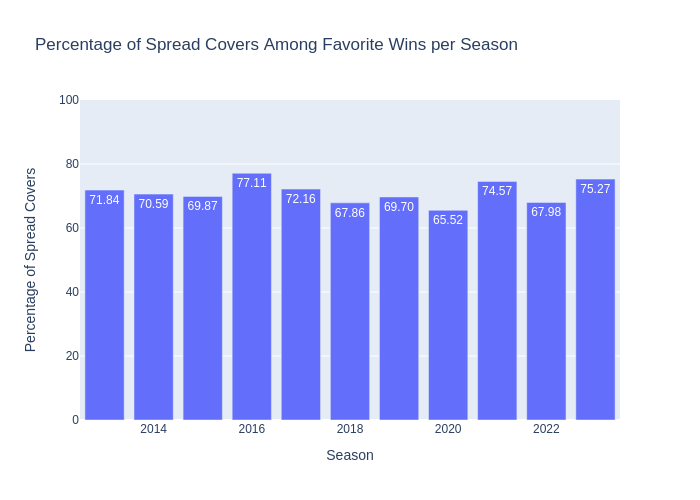

,Favorite Wins,Spread Covers,Percentage Spread Covers
schedule_season,,,
2013,174,125,71.839080
2014,170,120,70.588235
2015,156,109,69.871795
2016,166,128,77.108434
2017,176,127,72.159091
2018,168,114,67.857143
2019,165,115,69.696970
2020,174,114,65.517241
2021,173,129,74.566474


In [ ]:
#show now the percentage each season, in the y axis i want the 0 to 100 percent and in the x axis the percentage spread covers column

import pandas as pd
# Calculate total favorite wins and spread covers per season
favorite_wins_per_season = regular_season[regular_season['favorite_won'] == 1].groupby('schedule_season')['schedule_week'].count()
spread_covers_per_season = regular_season[(regular_season['favorite_won'] == 1) & (regular_season['covered_spread'] == 1)].groupby('schedule_season')['schedule_week'].count()

# Calculate percentage of spread covers among favorite wins
percentage_spread_covers = (spread_covers_per_season / favorite_wins_per_season) * 100

# Create a summary DataFrame
summary_df = pd.DataFrame({
    'Favorite Wins': favorite_wins_per_season,
    'Spread Covers': spread_covers_per_season,
    'Percentage Spread Covers': percentage_spread_covers
})

# Create a bar plot using Plotly Express
fig = px.bar(summary_df, x=summary_df.index, y='Percentage Spread Covers',
             labels={'x': 'Season', 'y': 'Percentage of Spread Covers'},
             title='Percentage of Spread Covers Among Favorite Wins per Season',
             text_auto='.2f')  # Add text labels to bars with 2 decimal places

# Update layout for better presentation
fig.update_layout(xaxis_title='Season', yaxis_title='Percentage of Spread Covers', yaxis_range=[0, 100])

# Display the plot
fig.show()
summary_df

In [ ]:
#export the files
fig.write_image("/content/drive/MyDrive/NFL_DATA_ANALYSIS/CSVs/fig4.png")

In [ ]:
#export the files
summary_df.to_csv('/content/drive/MyDrive/NFL_DATA_ANALYSIS/CSVs/fav_wins_spread_covers_percentage.csv')

In [ ]:
regular_season

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_humidity,weather_detail,total_score,over_line,favorite_won,covered_spread
10809,2013-09-05,2013,1,0,DEN,49,27,BAL,DEN,7,49,Sports Authority Field at Mile High,0,83,30,NaN,76,1,1,1
10810,2013-09-08,2013,1,0,BUF,21,23,NE,NE,10,51,Ralph Wilson Stadium,0,65,55,NaN,44,0,1,0
10811,2013-09-08,2013,1,0,CAR,7,12,SEA,SEA,3,45,Bank of America Stadium,0,87,48,NaN,19,0,1,1
10812,2013-09-08,2013,1,0,CHI,24,21,CIN,CHI,3,42,Soldier Field,0,77,79,NaN,45,1,1,0
10813,2013-09-08,2013,1,0,CLE,10,23,MIA,CLE,2,40,FirstEnergy Stadium,0,72,80,NaN,33,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13783,2024-01-07,2023,18,0,NO,48,17,ATL,NO,3,41,Caesars Superdome,0,72,0,indoor,65,1,1,1
13784,2024-01-07,2023,18,0,NYG,27,10,PHI,PHI,5,43,MetLife Stadium,0,0,0,NaN,37,0,0,0
13785,2024-01-07,2023,18,0,SF,20,21,LAR,SF,5,40,Levi's Stadium,0,0,0,NaN,41,1,0,0
13786,2024-01-07,2023,18,0,TEN,28,20,JAX,JAX,3,41,Nissan Stadium,0,0,0,NaN,48,1,0,0


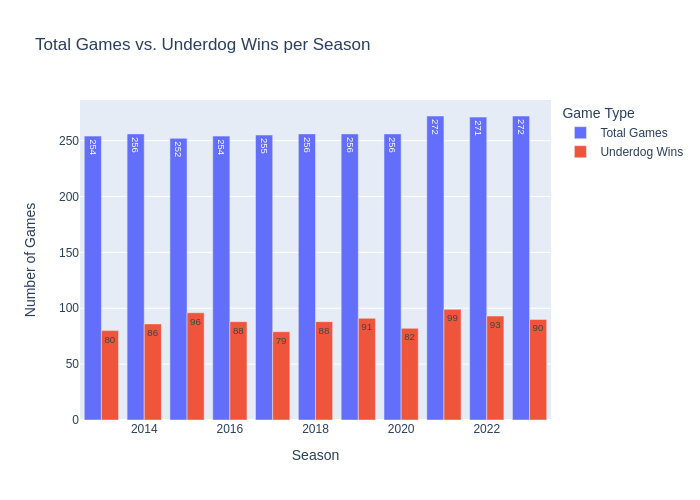

,Total Games,Underdog Wins,Percentage Underdog Wins
schedule_season,,,
2013,254,80,31.496063
2014,256,86,33.593750
2015,252,96,38.095238
2016,254,88,34.645669
2017,255,79,30.980392
2018,256,88,34.375000
2019,256,91,35.546875
2020,256,82,32.031250
2021,272,99,36.397059


In [ ]:
#from the perspective of the underdogs

# Calculate total games and underdog wins per season
games_per_season = regular_season.groupby('schedule_season')['schedule_week'].count()
underdog_wins_per_season = regular_season[regular_season['favorite_won'] == 0].groupby('schedule_season')['schedule_week'].count()

# Calculate percentage of underdog wins
percentage_underdog_wins = (underdog_wins_per_season / games_per_season) * 100

# Create a summary DataFrame
summary_df = pd.DataFrame({
    'Total Games': games_per_season,
    'Underdog Wins': underdog_wins_per_season,
    'Percentage Underdog Wins': percentage_underdog_wins
})

# Create a bar plot using Plotly Express
fig = px.bar(summary_df, x=summary_df.index, y=['Total Games', 'Underdog Wins'],
             barmode='group', labels={'x': 'Season', 'value': 'Number of Games'},
             title='Total Games vs. Underdog Wins per Season',
             text_auto='')  # Add text labels to bars with 2 decimal places

# Update layout for better presentation
fig.update_layout(xaxis_title='Season', yaxis_title='Number of Games', legend_title='Game Type')
fig.update_traces(textposition='inside')

# Display the plot
fig.show()
summary_df

In [ ]:
#export the files
summary_df.to_csv('/content/drive/MyDrive/NFL_DATA_ANALYSIS/CSVs/total_vs_underdog_wins.csv')
fig.write_image("/content/drive/MyDrive/NFL_DATA_ANALYSIS/CSVs/fig4.png")

In [ ]:
# Calculate if the underdog pushed the line
regular_season['underdog_pushed'] = (
    (regular_season['favorite_won'] == 1) &
    (
        (
            (regular_season['team_favorite_id'] == regular_season['team_home']) &
            (regular_season['score_home'] - regular_season['score_away'] == regular_season['spread_favorite'])
        ) |
        (
            (regular_season['team_favorite_id'] == regular_season['team_away']) &
            (regular_season['score_away'] - regular_season['score_home'] == regular_season['spread_favorite'])
        )
    )
)

# Convert boolean values in 'underdog_pushed' to integers (1 for True, 0 for False)
regular_season['underdog_pushed'] = regular_season['underdog_pushed'].astype(int)

regular_season


,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,...,stadium,stadium_neutral,weather_temperature,weather_humidity,weather_detail,total_score,over_line,favorite_won,covered_spread,underdog_pushed
10809,2013-09-05,2013,1,0,DEN,49,27,BAL,DEN,7,...,Sports Authority Field at Mile High,0,83,30,NaN,76,1,1,1,0
10810,2013-09-08,2013,1,0,BUF,21,23,NE,NE,10,...,Ralph Wilson Stadium,0,65,55,NaN,44,0,1,0,0
10811,2013-09-08,2013,1,0,CAR,7,12,SEA,SEA,3,...,Bank of America Stadium,0,87,48,NaN,19,0,1,1,0
10812,2013-09-08,2013,1,0,CHI,24,21,CIN,CHI,3,...,Soldier Field,0,77,79,NaN,45,1,1,0,1
10813,2013-09-08,2013,1,0,CLE,10,23,MIA,CLE,2,...,FirstEnergy Stadium,0,72,80,NaN,33,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13783,2024-01-07,2023,18,0,NO,48,17,ATL,NO,3,...,Caesars Superdome,0,72,0,indoor,65,1,1,1,0
13784,2024-01-07,2023,18,0,NYG,27,10,PHI,PHI,5,...,MetLife Stadium,0,0,0,NaN,37,0,0,0,0
13785,2024-01-07,2023,18,0,SF,20,21,LAR,SF,5,...,Levi's Stadium,0,0,0,NaN,41,1,0,0,0
13786,2024-01-07,2023,18,0,TEN,28,20,JAX,JAX,3,...,Nissan Stadium,0,0,0,NaN,48,1,0,0,0


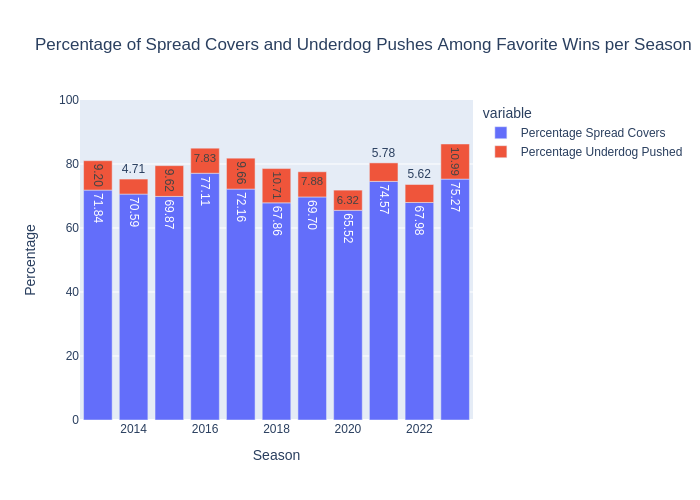

In [ ]:
# Calculate total favorite wins and spread covers per season and add the times the underdog pushed
favorite_wins_per_season = regular_season[regular_season['favorite_won'] == 1].groupby('schedule_season')['schedule_week'].count()
spread_covers_per_season = regular_season[(regular_season['favorite_won'] == 1) & (regular_season['covered_spread'] == 1)].groupby('schedule_season')['schedule_week'].count()
underdog_pushed_per_season = regular_season[regular_season['underdog_pushed'] == 1].groupby('schedule_season')['schedule_week'].count()
# Calculate percentage of spread covers among favorite wins
percentage_spread_covers = (spread_covers_per_season / favorite_wins_per_season) * 100
percentage_underdog_pushed = (underdog_pushed_per_season / favorite_wins_per_season) * 100

# Create a summary DataFrame
summary_df = pd.DataFrame({
    'Favorite Wins': favorite_wins_per_season,
    'Spread Covers': spread_covers_per_season,
    'Percentage Spread Covers': percentage_spread_covers,
    'Underdog Pushed': underdog_pushed_per_season,
    'Percentage Underdog Pushed': percentage_underdog_pushed
})

# Create a bar plot using Plotly Express
fig = px.bar(summary_df, x=summary_df.index, y=['Percentage Spread Covers', 'Percentage Underdog Pushed'],
             labels={'x': 'Season', 'y': 'Percentage'},
             title='Percentage of Spread Covers and Underdog Pushes Among Favorite Wins per Season',
             text_auto='.2f')  # Add text labels to bars with 2 decimal places

# Update layout for better presentation
fig.update_layout(xaxis_title='Season', yaxis_title='Percentage', yaxis_range=[0, 100])

# Display the plot
fig.show()


In [ ]:
#export the files
fig.write_image("/content/drive/MyDrive/NFL_DATA_ANALYSIS/CSVs/fig5.png")

In [ ]:
#export the files
summary_df.to_csv('/content/drive/MyDrive/NFL_DATA_ANALYSIS/CSVs/percentages_pushed_and_covers.csv')

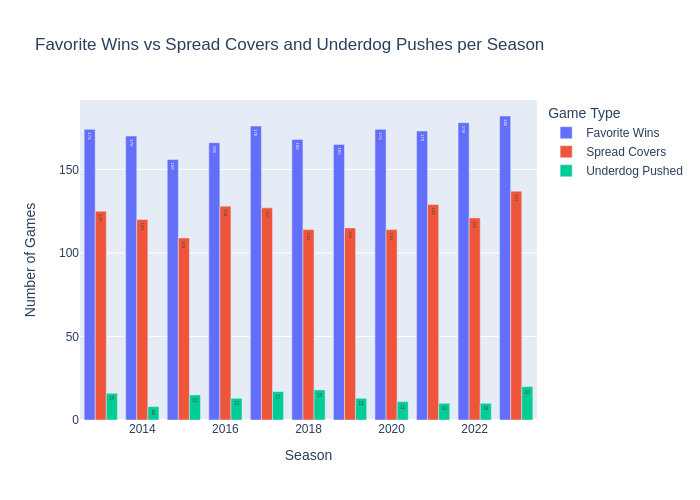

,Favorite Wins,Spread Covers,Underdog Pushed
schedule_season,,,
2013,174,125,16
2014,170,120,8
2015,156,109,15
2016,166,128,13
2017,176,127,17
2018,168,114,18
2019,165,115,13
2020,174,114,11
2021,173,129,10


In [ ]:
# prompt: the same plot as above but display the bars separated not in the same bar

import pandas as pd
# Calculate total favorite wins and spread covers per season and add the times the underdog pushed
favorite_wins_per_season = regular_season[regular_season['favorite_won'] == 1].groupby('schedule_season')['schedule_week'].count()
spread_covers_per_season = regular_season[(regular_season['favorite_won'] == 1) & (regular_season['covered_spread'] == 1)].groupby('schedule_season')['schedule_week'].count()
underdog_pushed_per_season = regular_season[regular_season['underdog_pushed'] == 1].groupby('schedule_season')['schedule_week'].count()

# Create a summary DataFrame
summary_df = pd.DataFrame({
    'Favorite Wins': favorite_wins_per_season,
    'Spread Covers': spread_covers_per_season,
    'Underdog Pushed': underdog_pushed_per_season
})

# Create a bar plot using Plotly Express
fig = px.bar(summary_df, x=summary_df.index, y=['Favorite Wins', 'Spread Covers','Underdog Pushed'],
             barmode='group',  # Set barmode to 'group' for separated bars
             labels={'x': 'Season', 'y': 'Number of Games'},
             title='Favorite Wins vs Spread Covers and Underdog Pushes per Season',
             text_auto='')  # Add text labels to bars

# Update layout for better presentation
fig.update_layout(xaxis_title='Season', yaxis_title='Number of Games', legend_title='Game Type')
fig.update_traces(textposition='inside')

# Display the plot
fig.show()
summary_df

In [ ]:
#export the files
fig.write_image("/content/drive/MyDrive/NFL_DATA_ANALYSIS/CSVs/fig6.png")

In [ ]:
#export the files
summary_df.to_csv('/content/drive/MyDrive/NFL_DATA_ANALYSIS/CSVs/fav_wins_spread_covers_ud_pushed.csv')

In [ ]:
#create a csv with every element we used for the visualizations

favorite_wins_per_season = regular_season[regular_season['favorite_won'] == 1].groupby('schedule_season')['schedule_week'].count()
underdog_wins_per_season = regular_season[regular_season['favorite_won'] == 0].groupby('schedule_season')['schedule_week'].count()
underdog_pushed_per_season = regular_season[regular_season['underdog_pushed'] == 1].groupby('schedule_season')['schedule_week'].count()
spread_covers_per_season = regular_season[(regular_season['favorite_won'] == 1) & (regular_season['covered_spread'] == 1)].groupby('schedule_season')['schedule_week'].count()
total_games_per_season = regular_season.groupby('schedule_season')['schedule_week'].count()
percentage_favorite_wins = (favorite_wins_per_season / total_games_per_season) * 100
percentage_spread_covers = (spread_covers_per_season / favorite_wins_per_season) * 100
percentage_underdog_wins = (underdog_wins_per_season / total_games_per_season) * 100
percentage_underdog_pushed = (underdog_pushed_per_season / favorite_wins_per_season) * 100


# Create a summary DataFrame
summary_df = pd.DataFrame({
    'Total Games': total_games_per_season,
    'Favorite Wins': favorite_wins_per_season,
    'Spread Covers': spread_covers_per_season,
    'Percentage Spread Covers': percentage_spread_covers,
    'Underdog Pushed': underdog_pushed_per_season,
    'Percentage Underdog Pushed': percentage_underdog_pushed,
    'Underdog Wins': underdog_wins_per_season,
    'Percentage Favorite Wins': percentage_favorite_wins,
    'Percentage Underdog Wins': percentage_underdog_wins,
})

summary_df.to_csv('/content/drive/MyDrive/NFL_DATA_ANALYSIS/CSVs/all_elements.csv')
